In [2]:
import numpy as np
import matplotlib as mpl
from pylab import *
%matplotlib inline


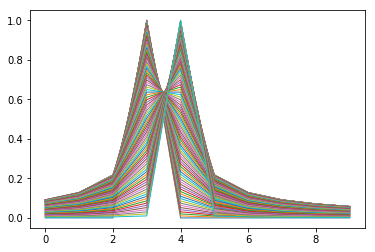

In [14]:
n = 256
offsets = np.arange(0,1, 0.01)
t = np.arange(n)/float(n)
f = 3
a = []
for o in offsets:
    x = np.exp(2*np.pi*1j*(f+o)*t)
    xf = abs(np.fft.fft(x)/float(n))
    plot(xf[0:10])
    a.append(xf[3])
               

In [15]:
pitch=0.9 # degrees
pixsize=pitch/float(n)*3600
f1 = 1.32 + 0.336/2. # GHhz
lam1 = 3e8/f1/1e9
bmax=2e3
res = np.degrees(lam1/bmax)*3600.
os = res/pixsize
print 'Bmax {} FFT {}x{} PIxsize {} arcsec. Resolution {} arcsec os {} FoV = {}'.format(bmax, n, n, pixsize, res, os, pitch)


Bmax 2000.0 FFT 256x256 PIxsize 12.65625 arcsec. Resolution 20.7928232104 arcsec os 1.64288973514 FoV = 0.9


Text(0,0.5,'FFT score')

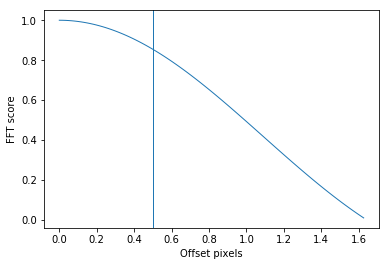

In [16]:
plot(offsets*os, a)
axvline(0.5)
xlabel('Offset pixels')
ylabel('FFT score')

In [45]:
uv = np.zeros((n,n), dtype=np.complex64)
%timeit np.fft.fft2(uv)

The slowest run took 5.11 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.42 ms per loop


In [50]:
%timeit np.fft.ifft2(uv)

1000 loops, best of 3: 1.7 ms per loop


In [51]:
%timeit np.fft.rfft2(uv)

1000 loops, best of 3: 783 µs per loop


In [52]:
%timeit np.fft.irfft2(uv)

100 loops, best of 3: 3.03 ms per loop
